<a href="https://colab.research.google.com/github/Erpan11400/Scientific-Computing-LAB/blob/main/2702271373_Ervan_Setyatama_AOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AOL Scientific Computing - LC20
##Ervan Setyatama - 2702271373

###Nomor 1

Mean Squared Error: 82651.601
R-squared: 0.996



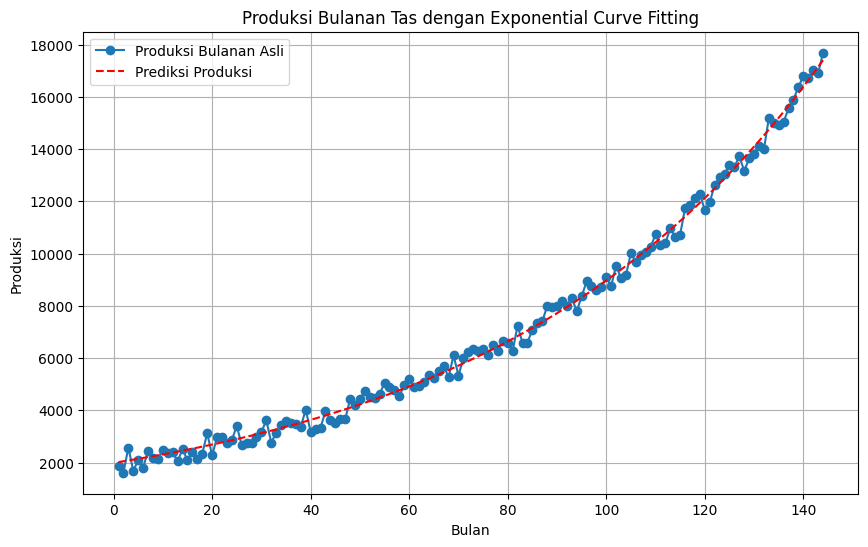


Grafik ini menunjukan grafik pertumbuhan eksponensial dari data EGIER, karena tren terllihat naik

Model matematika adalah y = a * e^(b*x)
Maka model matematika dari grafik di atas adalah : y = 1991.285 * e^(0.015x)
Dari model tersebut sudah diuji dengan pendekatan polinomial


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Production data
production_data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Membuat variabel x dari banyaknya data
x_data = np.arange(1, len(production_data) + 1)

# Rumus fungsi eksponensial
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Fit the curve
params, covariance = curve_fit(exponential_func, x_data, production_data, p0=[1, 0.01])

# Extract the parameters
a, b = params

# Generate y values from the fitted model
fitted_y = exponential_func(x_data, a, b)

# Evaluasi model
mse = mean_squared_error(production_data, fitted_y)
r2 = r2_score(production_data, fitted_y)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}\n")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, production_data, marker='o', linestyle='-', label='Produksi Bulanan Asli')
plt.plot(x_data, fitted_y, color='red', linestyle='--', label='Prediksi Produksi')
plt.title('Produksi Bulanan Tas dengan Exponential Curve Fitting')
plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.legend()
plt.grid(True)
plt.show()

print("\nGrafik ini menunjukan grafik pertumbuhan eksponensial dari data EGIER, karena tren terllihat naik")
print(f"\nModel matematika adalah y = a * e^(b*x)\nMaka model matematika dari grafik di atas adalah : y = {a:.3f} * e^({b:.3f}x)")
print("Dari model tersebut sudah diuji dengan pendekatan polinomial")

###Nomor 2

In [ ]:
# Mencocokkan model polinomial
coefficients = np.polyfit(x_data, production_data, 5)

# Membuat persamaan polinomial berdasarkan koefisien yang ditemukan
polynomial_equation = np.poly1d(coefficients)

# Mencetak persamaan polinomial
print(f"Dari data diatas juga di dapatkan model polinomial\n\nPersamaan Polinomial: \n {polynomial_equation}")


Grafik ini menunjukan grafik pertumbuhan eksponensial dari data EGIER, karena tren terllihat naik

Model matematika adalah y = a * e^(b*x)
Maka model matematika dari grafik di atas adalah : y = 1991.285 * e^(0.015x)
Dari model tersebut sudah diuji dengan pendekatan polinomial
Dari data diatas juga di dapatkan model polinomial

Persamaan Polinomial: 
            5             4            3            2
2.515e-07 x - 6.251e-05 x + 0.007325 x - 0.001457 x + 35.52 x + 1869


###Nomor 3

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Membuat dan melatih model regresi polinomial
Polyy = PolynomialFeatures(degree=5)
x_poly = Polyy.fit_transform(x_data.reshape(-1, 1))
model_polinomial = LinearRegression()
model_polinomial.fit(x_poly, production_data)

# Menentukan prediksi produksi masa depan
bulan_masa_depan = np.arange(len(production_data), len(production_data) + 50)
bulan_masa_depan_polinomial = Polyy.transform(bulan_masa_depan.reshape(-1, 1))
prediksi_produksi_masa_depan = model_polinomial.predict(bulan_masa_depan_polinomial)

# Menemukan kapan produksi melebihi target
target_produksi = 25000
indeks_terlampaui = np.where(prediksi_produksi_masa_depan > target_produksi)[0][0]
bulan_terlampaui = bulan_masa_depan[indeks_terlampaui]
tanggal_terlampaui = pd.to_datetime("2018-01-01") + pd.DateOffset(months=bulan_terlampaui)

# Menghitung waktu mulai pembangunan gudang (13 bulan sebelum produksi melebihi target)
tanggal_mulai_pembangunan = tanggal_terlampaui - pd.DateOffset(months=13)

print(f"Jawaban nomor 3: EIGER perlu gudang baru pada bulan: {tanggal_terlampaui.strftime('%Y-%m')}")
print(f"EIGER perlu mulai membangun gudang baru setidaknya dari bulan: {tanggal_mulai_pembangunan.strftime('%Y-%m')}")


Jawaban nomor 3: EIGER perlu gudang baru pada bulan: 2031-10
EIGER perlu mulai membangun gudang baru setidaknya dari bulan: 2030-09


#Test

MSE Pelatihan: 93377.602
MSE Pengujian: 79493.135



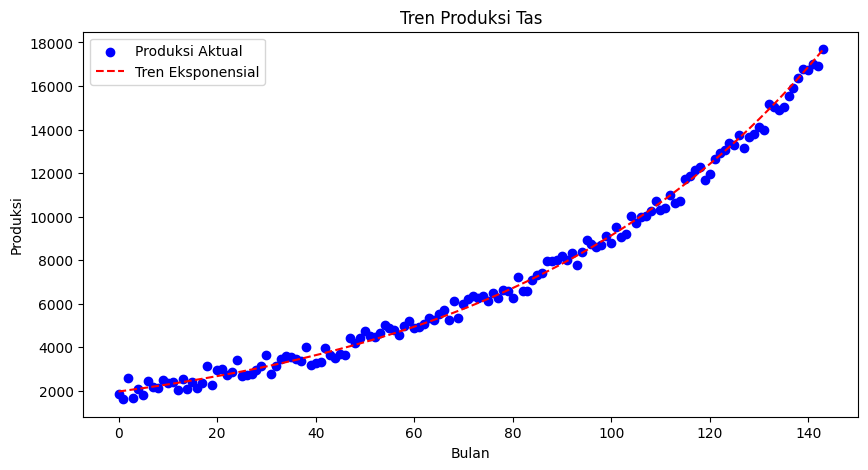


Jawaban nomor 1: Trend naik, terlihat seperti grafik pertumbuhan eksponensial.
Model Eksponensial: y = 1967.292 * e^(0.015x).
Dengan menghindari pendekatan linear, kita akan menggunakan pendekatan polinomial.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split

# Data produksi langsung dalam bentuk list
produksi = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Menyusun data produksi dari bentuk tabel ke bentuk array
produksi = np.array(produksi)
bulan = np.arange(len(produksi))

# Membagi data menjadi set pelatihan dan pengujian
bulan_latih, bulan_uji, produksi_latih, produksi_uji = train_test_split(bulan, produksi, test_size=0.2, random_state=42)

# (1) Model Regresi Eksponensial
log_produksi_latih = np.log(produksi_latih)
log_produksi_uji = np.log(produksi_uji)

# Regresi linear pada data yang ditransformasi
model = LinearRegression()
model.fit(bulan_latih.reshape(-1, 1), log_produksi_latih)
log_produksi_prediksi_latih = model.predict(bulan_latih.reshape(-1, 1))
log_produksi_prediksi_uji = model.predict(bulan_uji.reshape(-1, 1))

# Konversi kembali ke skala asli
produksi_prediksi_latih = np.exp(log_produksi_prediksi_latih)
produksi_prediksi_uji = np.exp(log_produksi_prediksi_uji)

# Menghitung MSE pada data pelatihan dan pengujian
mse_latih = mean_squared_error(produksi_latih, produksi_prediksi_latih)
mse_uji = mean_squared_error(produksi_uji, produksi_prediksi_uji)

print(f"MSE Pelatihan: {mse_latih:.3f}")
print(f"MSE Pengujian: {mse_uji:.3f}\n")

# Memplot tren
produksi_prediksi_semua = np.exp(model.predict(bulan.reshape(-1, 1)))

plt.figure(figsize=(10, 5))
plt.scatter(bulan, produksi, color='blue', label='Produksi Aktual')
plt.plot(bulan, produksi_prediksi_semua, color='red', label='Tren Eksponensial', linestyle="--")
plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.title('Tren Produksi Tas')
plt.legend()
plt.show()

# (1) Penjelasan model eksponensial
a = np.exp(model.intercept_)
b = model.coef_[0]
print(f"\nJawaban nomor 1: Trend naik, terlihat seperti grafik pertumbuhan eksponensial.\nModel Eksponensial: y = {a:.3f} * e^({b:.3f}x).\nDengan menghindari pendekatan linear, kita akan menggunakan pendekatan polinomial.")

In [ ]:
# Fungsi untuk menghitung MSE dengan validasi silang
def mse_cross_val(degree):
    polinomial = PolynomialFeatures(degree=degree)
    bulan_latih_poly = polinomial.fit_transform(bulan_latih.reshape(-1, 1))
    model = LinearRegression()
    mse_scores = -cross_val_score(model, bulan_latih_poly, produksi_latih, scoring='neg_mean_squared_error', cv=5)
    return mse_scores.mean()

# Menentukan orde terbaik berdasarkan MSE terendah
orde_max = 10
mse_values = []
for degree in range(1, orde_max + 1):
    mse = mse_cross_val(degree)
    mse_values.append(mse)
    print(f"Degree {degree}, MSE: {mse:.3f}")

# Menentukan orde dengan MSE terendah
orde_terbaik = np.argmin(mse_values) + 1
print(f"\nOrde terbaik untuk regresi polinomial: {orde_terbaik}")

# (2) Prediksi kebutuhan gudang dengan regresi polinomial
polinomial = PolynomialFeatures(degree=orde_terbaik)
bulan_latih_poly = polinomial.fit_transform(bulan_latih.reshape(-1, 1))
bulan_uji_poly = polinomial.transform(bulan_uji.reshape(-1, 1))

model_polinomial = LinearRegression()
model_polinomial.fit(bulan_latih_poly, produksi_latih)
produksi_prediksi_latih_poly = model_polinomial.predict(bulan_latih_poly)
produksi_prediksi_uji_poly = model_polinomial.predict(bulan_uji_poly)

# Menghitung MSE pada data pelatihan dan pengujian untuk model polinomial
mse_latih_poly = mean_squared_error(produksi_latih, produksi_prediksi_latih_poly)
mse_uji_poly = mean_squared_error(produksi_uji, produksi_prediksi_uji_poly)

# Menentukan model numerik
koefisien_model = model_polinomial.coef_
intercept_model = model_polinomial.intercept_
persamaan_model = f"y = {intercept_model:.3f} "
for i, koef in enumerate(koefisien_model[1:], 1):
    persamaan_model += f"+ {koef:.3e} x^{i} "

print(f"Jawaban nomor 2: ini cukup akurat, karena sudah memakai MSE dan cross-validation untuk menentukan orde regresi polinomnya.\nModel Numerik Polinomial: {persamaan_model}")

Degree 1, MSE: 1451318.276
Degree 2, MSE: 144577.408
Degree 3, MSE: 91038.231
Degree 4, MSE: 87433.480
Degree 5, MSE: 87101.677
Degree 6, MSE: 87315.425
Degree 7, MSE: 87978.675
Degree 8, MSE: 88313.335
Degree 9, MSE: 101020.732
Degree 10, MSE: 116491.236

Orde terbaik untuk regresi polinomial: 5
Jawaban nomor 2: ini cukup akurat, karena sudah memakai MSE dan cross-validation untuk menentukan orde regresi polinomnya.
Model Numerik Polinomial: y = 1847.386 + 4.607e+01 x^1 + -4.639e-01 x^2 + 1.586e-02 x^3 + -1.281e-04 x^4 + 4.304e-07 x^5 


In [ ]:
# (3) Prediksi kebutuhan gudang
target_produksi = 25000
bulan_masa_depan = np.arange(len(produksi), len(produksi) + 50)
bulan_masa_depan_polinomial = polinomial.transform(bulan_masa_depan.reshape(-1, 1))
prediksi_produksi_masa_depan = model_polinomial.predict(bulan_masa_depan_polinomial)

# Menemukan kapan produksi melebihi target
indeks_terlampaui = np.where(prediksi_produksi_masa_depan > target_produksi)[0][0]
bulan_terlampaui = bulan_masa_depan[indeks_terlampaui]
tanggal_terlampaui = pd.to_datetime("2018-01-01") + pd.DateOffset(months=bulan_terlampaui)

# Menghitung waktu mulai pembangunan gudang (13 bulan sebelum produksi melebihi target)
tanggal_mulai_pembangunan = tanggal_terlampaui - pd.DateOffset(months=13)

print(f"Jawaban nomor 3: EIGER perlu gudang baru pada bulan: {tanggal_terlampaui.strftime('%Y-%m')}")
print(f"EIGER perlu mulai membangun gudang baru setidaknya dari bulan: {tanggal_mulai_pembangunan.strftime('%Y-%m')}")

Jawaban nomor 3: EIGER perlu gudang baru pada bulan: 2031-09
EIGER perlu mulai membangun gudang baru setidaknya dari bulan: 2030-08


Persamaan eksponensial: y = 1937.01 * e^(0.015340x)
MSE: 88911.15
R-squared score: 1.00


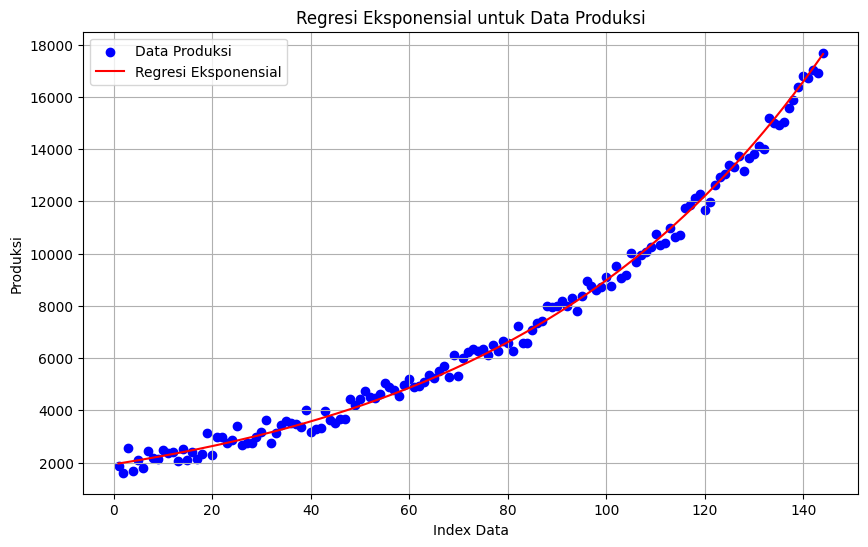

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Data produksi
production_data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689
]

# Menentukan sumbu x dari data
x = np.arange(1, len(production_data) + 1)

# Regresi polinomial orde 1 (linier)
coefficients = np.polyfit(x, np.log(production_data), 1)
a = np.exp(coefficients[1])
b = coefficients[0]

# Prediksi menggunakan model
predicted_values = a * np.exp(b * x)

# Menghitung MSE
mse = mean_squared_error(production_data, predicted_values)

# Menghitung R-squared score
r_squared = r2_score(production_data, predicted_values)

# Persamaan eksponensial: y = a * e^(bx)
print(f"Persamaan eksponensial: y = {a:.2f} * e^({b:.6f}x)")
print(f"MSE: {mse:.2f}")
print(f"R-squared score: {r_squared:.2f}")

# Plot data dan kurva regresi
plt.figure(figsize=(10, 6))
plt.scatter(x, production_data, color='blue', label='Data Produksi')
plt.plot(x, predicted_values, color='red', label='Regresi Eksponensial')
plt.xlabel('Index Data')
plt.ylabel('Produksi')
plt.title('Regresi Eksponensial untuk Data Produksi')
plt.legend()
plt.grid(True)
plt.show()
